# Two populations model 


Written by Udi Aharoni  
Based on "Signals Evolution, Learning, & Information" Brian Skyrms

Populating the interactive namespace from numpy and matplotlib


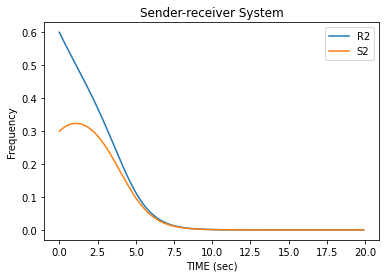

In [ ]:
%pylab inline
from scipy.integrate import odeint


p=1 # payoff for successful transmision
w0=0.5

def SendReceive(state,t):

  pr2 = state[0]
  ps2 = state[1]

  fr2=w0+ps2*p
  fr1=w0+(1-ps2)*p
  fs2=w0+pr2*p
  fs1=w0+(1-pr2)*p

  fr_bar=pr2*fr2+(1-pr2)*fr1
  fs_bar=ps2*fs2+(1-ps2)*fs1
  
  fr2d=pr2*(fr2-fr_bar)
  fs2d=ps2*(fs2-fs_bar)
  return [fr2d,fs2d]

t = arange(0.0, 20.0, 0.1)
state0=[0.6,0.3]

state = odeint(SendReceive, state0, t)

plot(t, state)



xlabel('TIME (sec)')

ylabel('Frequency')

title('Sender-receiver System')
legend(['R2','S2'])




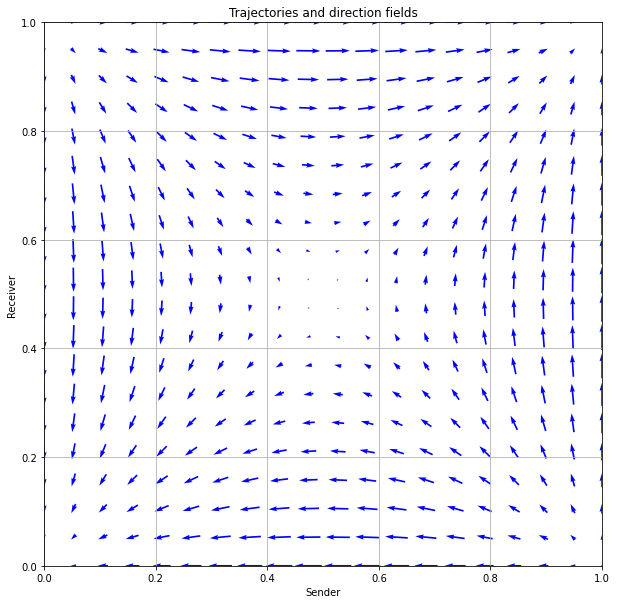

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
cmap = cm.get_cmap('Spectral')

nb_points   = 20                      
xmax=1
ymax=1
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = SendReceive([X1, Y1],0)        #second argument to LV is igrnoed
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 0.0001                                 # Avoid zero division errors 
#DX1 /= M                                        # Normalize each arrows
#DY1 /= M  
#M /= 2

title('Trajectories and direction fields')


Q = quiver(X1, Y1, DX1, DY1,  pivot='mid',color=[0,0,1])


xlabel('Sender')

ylabel('Receiver')

grid()

xlim(0, xmax)

ylim(0, ymax);

# Learning model

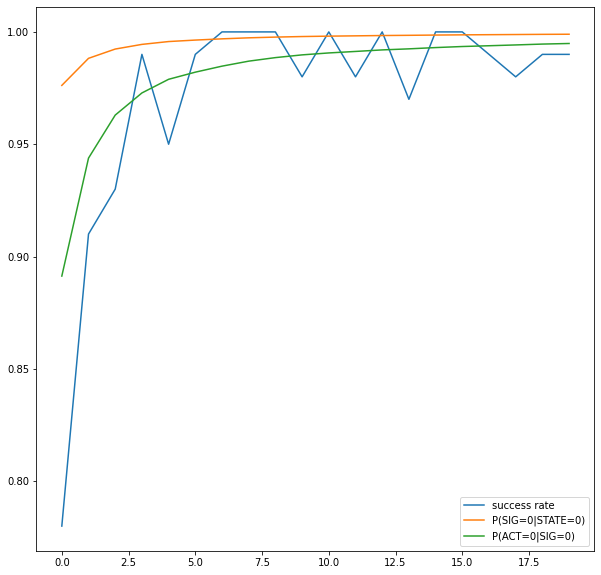

In [ ]:
import random as R
gens=20
steps=100
w=1
urnSend=[[w,w],[w,w]]
urnReceive=[[w,w],[w,w]]

avgSucc=0.5

gres=[]
p1=[]
p2=[]
for g in range(gens):
  res=[]
  for i in range(steps):
    state=R.choice([0,1]);
    us=urnSend[state]
    
    signal=R.choices([0,1],us,k=1)[0]
    ur=urnReceive[signal]
    action=R.choices([0,1],ur,k=1)[0]
    succ=0
    
    if (action==state):
      us[signal]=us[signal]+1
      ur[action]=ur[action]+1
      succ=1
    #print(action,signal,state,succ)      
    res.append(succ);
  gres.append(mean(res));
  p1.append(urnSend[0][0]/(urnSend[0][0]+urnSend[0][1]));
  p2.append(urnReceive[0][0]/(urnReceive[0][0]+urnReceive[0][1]));
plot(gres)
plot(p1)
plot(p2)
legend(['success rate','P(SIG=0|STATE=0)','P(ACT=0|SIG=0)'])

